In [16]:
import pandas as pd
import sklearn as datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
dataset=pd.read_csv('c:/BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
print(dataset.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [20]:
x=pd.DataFrame(dataset.iloc[:,:-1])
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [21]:
y=pd.DataFrame(dataset.iloc[:,-1])
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [23]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

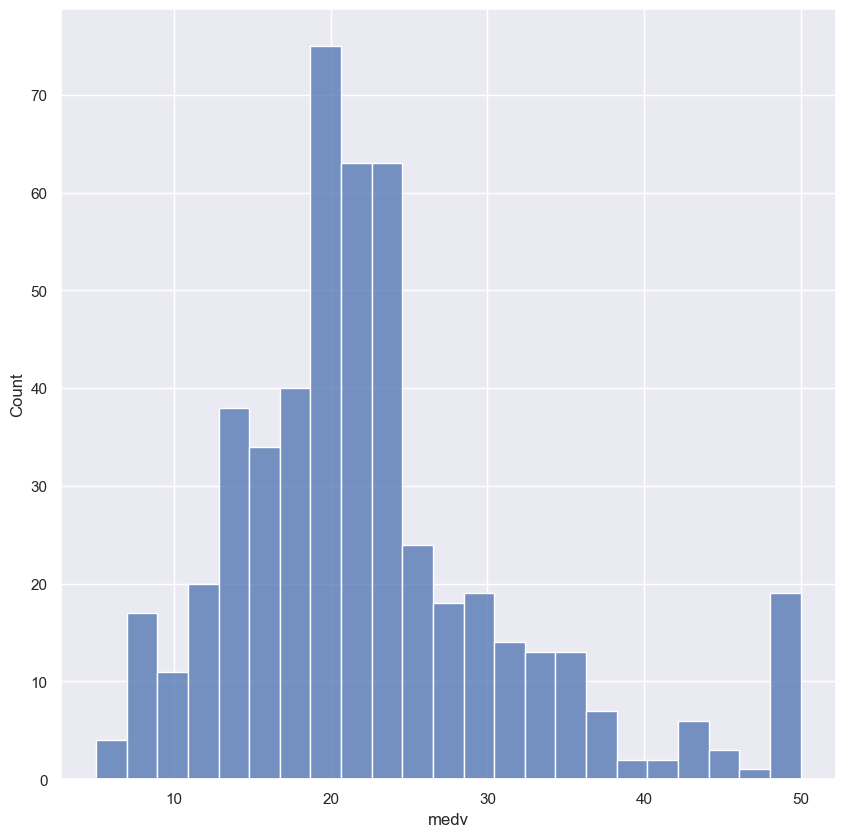

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(dataset,x="medv")
plt.show()

<Axes: >

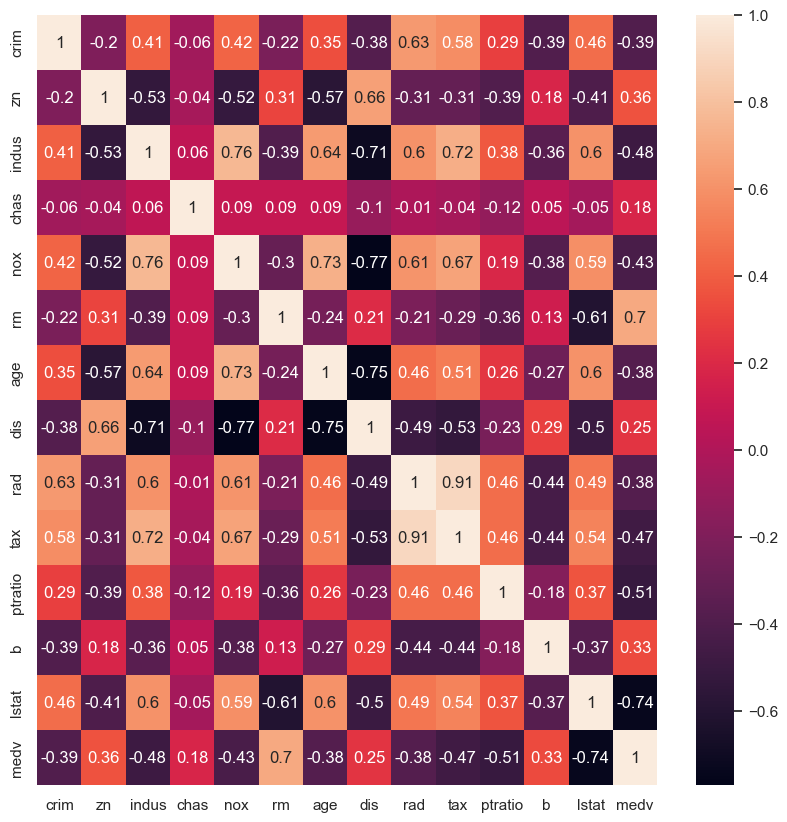

In [51]:
correlation_matrix=dataset.corr().round(2)
sns.heatmap(data=correlation_matrix,annot = True)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [40]:
x=dataset[['lstat']].values
y=dataset[['medv']].values

In [43]:
sort_idx=x.flatten().argsort()
x=x[sort_idx]
y=y[sort_idx]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
tree=DecisionTreeRegressor(criterion='friedman_mse',max_depth=3)
tree.fit(x,y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [47]:
tree.score(x_train,y_train)

0.6899043381042227

In [49]:
tree.score(x_test,y_test)

0.7267421597821606